### Advanced Lab Homework | Error Propagation and Linear Regression
**Author**: Ken Sible | **Date**: September 13, 2019

#### Problem 1: Spring Constant
-----

In [1]:
using PyPlot; PyPlot.svg(true);

In [2]:
m, L = collect(200:100:900), [5.1, 5.5, 5.9, 6.8, 7.4, 7.5, 8.6, 9.4];

Let $a$ denote the slope and $b$ denote the intercept for the least squares function $y=ax+b$. We define $\alpha_a$ as the uncertainty in the slope and $\alpha_b$ as the uncertainty in the intercept after finding the best-fit line.

In [3]:
function leastsq(x, y, α)
    w = α.^(-2); Δ = sum(w)*sum(w.*x.^2) - (sum(w.*x))^2
    c = (sum(w.*x.^2)*sum(w.*y) - sum(w.*x)*sum(w.*x.*y))/Δ
    m = (sum(w)*sum(w.*x.*y) - sum(w.*x)*sum(w.*y))/Δ
    α_c = sqrt(sum(w.*x.^2)/Δ)
    α_m = sqrt(sum(w)/Δ)
    return m, c, α_m, α_c
end
leastsq(x, y) = leastsq(x, y, ones(length(x)))

α, g = fill(0.2, length(m)), 9.8;

##### Model 1:
$$
\begin{gather}
    F=k_1\Delta L_1=k_1(L-L_1)=mg\\
    L=\left(\frac{g}{k_1}\right)m+L_1\\
    k_1=\frac{g}{a}\therefore\delta k_1=\left|\frac{d}{da}\left(\frac{g}{a}\right)\right|\alpha_a=\frac{g}{a^2}\alpha_a
\end{gather}
$$

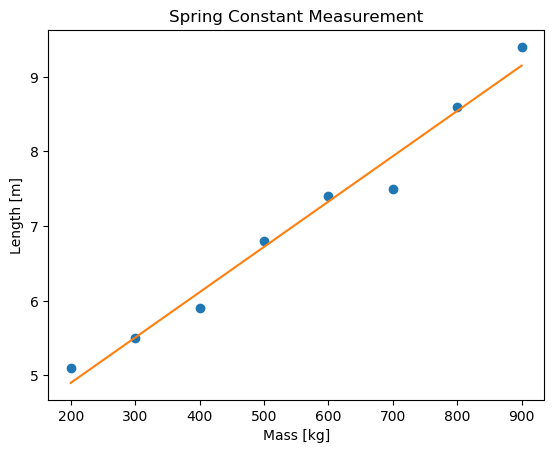

k_1 = 1614.1176470588223, L_1 = 3.685714285714289
δk_1 = 82.04453276323481, δL_1 = 0.18387366263150312


In [4]:
a, b, α_a, α_b = leastsq(m, L, α)
k, L_0 = g/a, b; f(x) = a*x + b
δk, δL_0 = (g/a^2)*α_a, α_b
println("k_1 = $k, L_1 = $L_0")
println("δk_1 = $δk, δL_1 = $δL_0")

plot(m, L, "o"); plot(m, f.(m))
plt.ylabel("Length [m]"); plt.xlabel("Mass [kg]")
plt.title("Spring Constant Measurement");

##### Model 2:
$$
\begin{gather}
    F=k_{0.5}(\Delta L_{0.5})^{0.5}=k_{0.5}(L-L_{0.5})^{0.5}=mg\\
    L=\left(\frac{g}{k_{0.5}}\right)^2m^2+L_{0.5}\\
    k_{0.5}=\frac{g}{a^{0.5}}\therefore\delta k_{0.5}=\left|\frac{d}{da}\left(\frac{g}{a^{0.5}}\right)\right|\alpha_a=\frac{g}{2a^{1.5}}\alpha_a
\end{gather}
$$

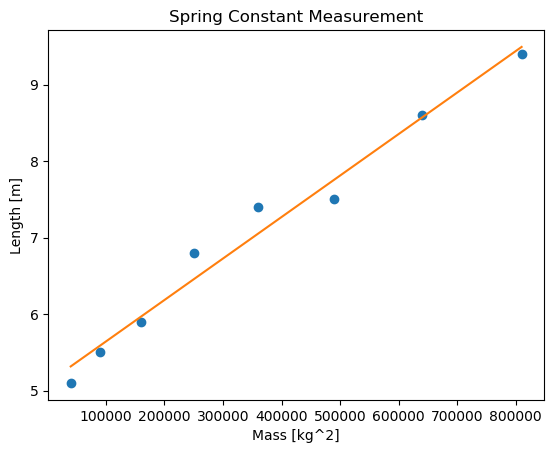

k_{0.5} = 4206.873981686244, L_{0.5} = 5.098533333333332
δk_{0.5} = 106.99086660645374, δL_{0.5} = 0.12083834143972998


In [5]:
a, b, α_a, α_b = leastsq(m.^2, L, α)
k, L_0 = g/sqrt(a), b; f(x) = a*x + b
δk, δL_0 = (g/2a^1.5)*α_a, α_b
println("k_{0.5} = $k, L_{0.5} = $L_0")
println("δk_{0.5} = $δk, δL_{0.5} = $δL_0")

plot(m.^2, L, "o"); plot(m.^2, f.(m.^2))
plt.ylabel("Length [m]"); plt.xlabel("Mass [kg^2]")
plt.title("Spring Constant Measurement");

##### Relevant Least Squares and Uncertainty Formulas
$$
\begin{gather}
    w_i = \alpha_i^{-2},\,\forall i\\
    c=\frac{\sum_iw_ix_i^2\sum_iw_iy_i-\sum_iw_ix_i\sum_iw_ix_iy_i}{\Delta'}\\
    m=\frac{\sum_iw_i\sum_iw_ix_iy_i-\sum_iw_ix_i\sum_iw_iy_i}{\Delta'}\\
    \alpha_c=\sqrt{\frac{\sum_iw_ix_i^2}{\Delta'}}\\
    \alpha_m=\sqrt{\frac{\sum_iw_i}{\Delta'}}\\
    \Delta'=\sum_iw_i\sum_iw_ix_i^2-\left(\sum_iw_ix_i\right)^2
\end{gather}
$$

##### Problem Discussion: TODO

#### Problem 2: Water Temperature
-----

In [6]:
t, T = collect(45:53), [98.51, 98.50, 98.50, 98.49, 98.52, 98.49, 98.52, 98.45, 98.47];

$$
\alpha_{\bar{x}}=\frac{\alpha_x}{\sqrt{N}}\text{ where }\bar{x}=\frac{1}{N}\sum_ix_i
$$

In [7]:
N = length(T); mean = sum(T)/N
stdev = sqrt(sum((T .- mean).^2)/(N - 1))
print("mean(T) = $mean, stdev(T) = $stdev")

mean(T) = 98.49444444444445, stdev(T) = 0.022973414586816076

The mean and standard deviation are the same for all three cases because they have no  dependence on the uncertainties when those uncertainties are independent of the measurement.
##### Case 1: $\alpha_T=$ 0.000°$C$
$$ \alpha_\bar{x}=\frac{0.000}{\sqrt{9}}=0 $$

##### Case 2: $\alpha_T=$ 0.01°$C$
$$ \alpha_\bar{x}=\frac{0.01}{\sqrt{9}}=0.00\bar{3} $$

##### Case 3: $\alpha_T=$ 0.02°$C$
$$ \alpha_\bar{x}=\frac{0.02}{\sqrt{9}}=0.00\bar{6} $$

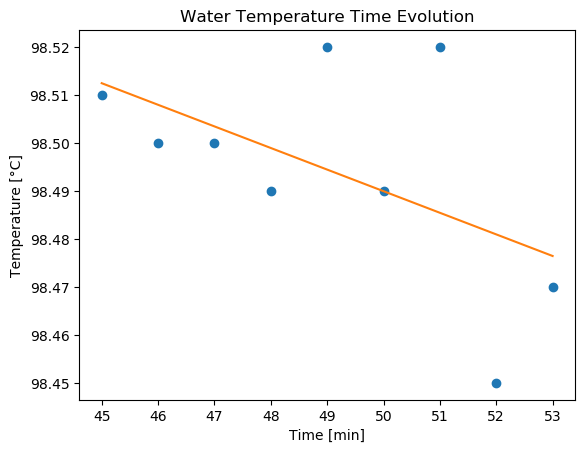

In [8]:
a, b, α_a, α_b = leastsq(t, T)
h(x) = a*x + b; plot(t, T, "o"); plot(t, h.(t))
plt.ylabel("Temperature [°C]"); plt.xlabel("Time [min]")
plt.title("Water Temperature Time Evolution");

In [9]:
println("Uncertainty Case (A): None")

a, b, α_a, α_b = leastsq(t, T, fill(0.01, length(t)))
println("Uncertainty Case (B): $α_a")

a, b, α_a, α_b = leastsq(t, T, fill(0.02, length(t)))
println("Uncertainty Case (C): $α_a")

println("dT/dt = $a")

Uncertainty Case (A): None
Uncertainty Case (B): 0.0012909944487358056
Uncertainty Case (C): 0.0025819888974716113
dT/dt = -0.0045


#### Problem 3: Planck's Constant
-----

In [10]:
λ  = [380, 400, 420, 472, 505, 525, 593, 605, 631]
Vs = [1.805, 1.557, 1.249, 1.063, 0.873, 0.748, 0.585, 0.458, 0.324]
δ_V, e, c = 0.1, 1.6e-19, 3e8;

$$
hf=KE-\phi\text{ where }f=\frac{c}{\lambda},\,V_s=\frac{KE}{e}\\
V_s=\frac{hc}{e}\lambda^{-1}+\frac{\phi}{e}\\
h=\frac{e}{c}a\therefore\delta h=\left|\frac{d}{da}\left(\frac{e}{c}a\right)\right|\alpha_a=\frac{e}{c}\alpha_a
$$

In [11]:
a, b, α_a, α_b = leastsq(λ.^(-1), Vs, fill(δ_V, length(λ)))
println("A) Slope = $a, Uncertainty = $α_a")
h_A = (e/c)*a; δh_A = (e/c)*α_a

a, b, α_a, α_b = leastsq(λ[3:7].^(-1), Vs[3:7], fill(δ_V, 5))
println("B) Slope = $a, Uncertainty = $α_a")
h_B = (e/c)*a; δh_B = (e/c)*α_a

a, b, α_a, α_b = leastsq([λ[1:2]; λ[8:9]].^(-1), [Vs[1:2]; Vs[8:9]], fill(δ_V, 4))
println("C) Slope = $a, Uncertainty = $α_a\n")
h_C = (e/c)*a; δh_C = (e/c)*α_a

println("h_A = $h_A, δh_A = $δh_A")
println("h_B = $h_B, δh_B = $δh_B")
println("h_C = $h_C, δh_C = $δh_C")

## NOTE: We are using nanometers! Hence, the 9 order of magnitude difference!

A) Slope = 1289.721527038491, Uncertainty = 91.77411220375876
B) Slope = 999.2828758944124, Uncertainty = 193.87693897585396
C) Slope = 1368.797857140147, Uncertainty = 104.9617674125799

h_A = 6.8785148108719525e-25, δh_A = 4.894619317533801e-26
h_B = 5.329508671436867e-25, δh_B = 1.0340103412045544e-25
h_C = 7.300255238080784e-25, δh_C = 5.597960928670928e-26
